# AI'S APPLICATION IN PREDICTING DEPRESSION AND IT'S ETHICAL CONCERNS

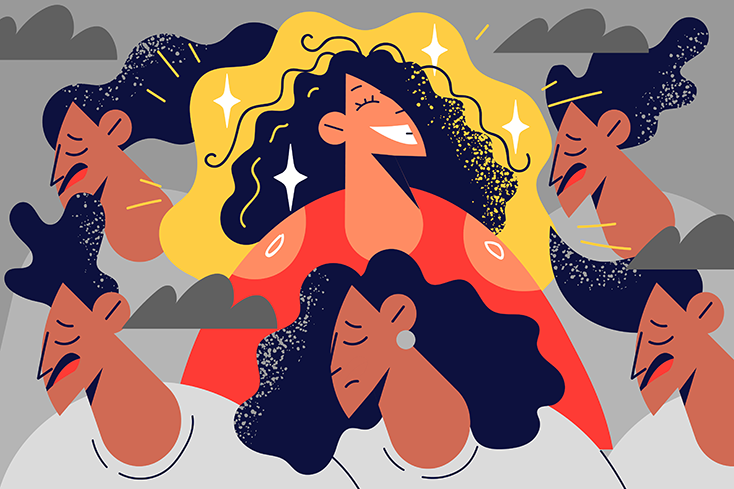
 
**<font size=4>Description:</font>**
 
<font size=2>The dataset is involved into the analysis of depression. The data was consists as a study about the life conditions of people who live in rurales zones.</font>
 
**Dataset source link**: https://www.kaggle.com/datasets/diegobabativa/depression?rvi=1

# Table of Content
* [1.Install_The_Needed_Packages](#1.Install_The_Needed_Packages)

* [2.Load_The_Required_Libraries](#2.Load_The_Required_Libraries)

* [3.Import_The_Dataset](#3.Import_The_Dataset)

* [4.Dropping_of_Unwanted_Column(s)](#4.Dropping_of_Unwanted_Column(s))

* [5.Exploratory_Data_Analysis](#5.Exploratory_Data_Analysis)

* [6.Show_The_Distribution_Of_Categories_In_Target_Variable](#6.Show_The_Distribution_Of_Categories_In_Target_Variable)

* [7.Prepare_The-Dataset_For_The_Model](#7.Prepare_The-Dataset_For_The_Model)

* [8.HyperParameter_Tuning](#8.HyperParameter_Tuning)

* [9.Bias_and_Fairness](#9.Bias_and_Fairness)

* [10.Transparency_(Explainable_AI)](#10.Transparency_(Explainable_AI))


## Install The Needed Packages

In [1]:
!pip install imblearn
!pip install lime

## Load The Required Libraries


The required libraries are added 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import hamming_loss
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

## Import The Dataset

Load the Dataset

In [3]:
# Load the dataset and display the top 5 rows
Dep = pd.read_csv('depressed.csv')
Dep.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [4]:
# Check for the number of rolls and columns
Dep.shape

(1429, 23)

In [5]:
# Show the Description of the daset
Dep.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [6]:
# Display datatype information on each column 
Dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [7]:
# Check for the number of null values for each column
Dep.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

This shows that the no_lasting_investment has a number of null values and it will not have an impact on the model if taken out, so this will be dropped before the building of the model.

In [8]:
Dep.dtypes

Survey_id                  int64
Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

## Dropping of Unwanted Column(s)

In [9]:
Dep = Dep[~(Dep.no_lasting_investmen.isnull())]
Dep = Dep.drop(["Survey_id", "Ville_id"],axis=1)

# Exploratory Data Analysis

This is to 

1. Better understand the data. explore the variables, their distributions, relationships, and potential patterns present in the data.

2. Assess the quality of the data. Early identification of data quality issues, such as missing values or inconsistencies, ensures high-quality modeling data, leading to more reliable outcomes.

3. Feature selecion and Engineering. Identifying relevant features for modeling BY analyzing the relationships between these features and the target variable to determine which variables are likely to be predictive.

## The depression column is plotted against various columns to see their relationship.

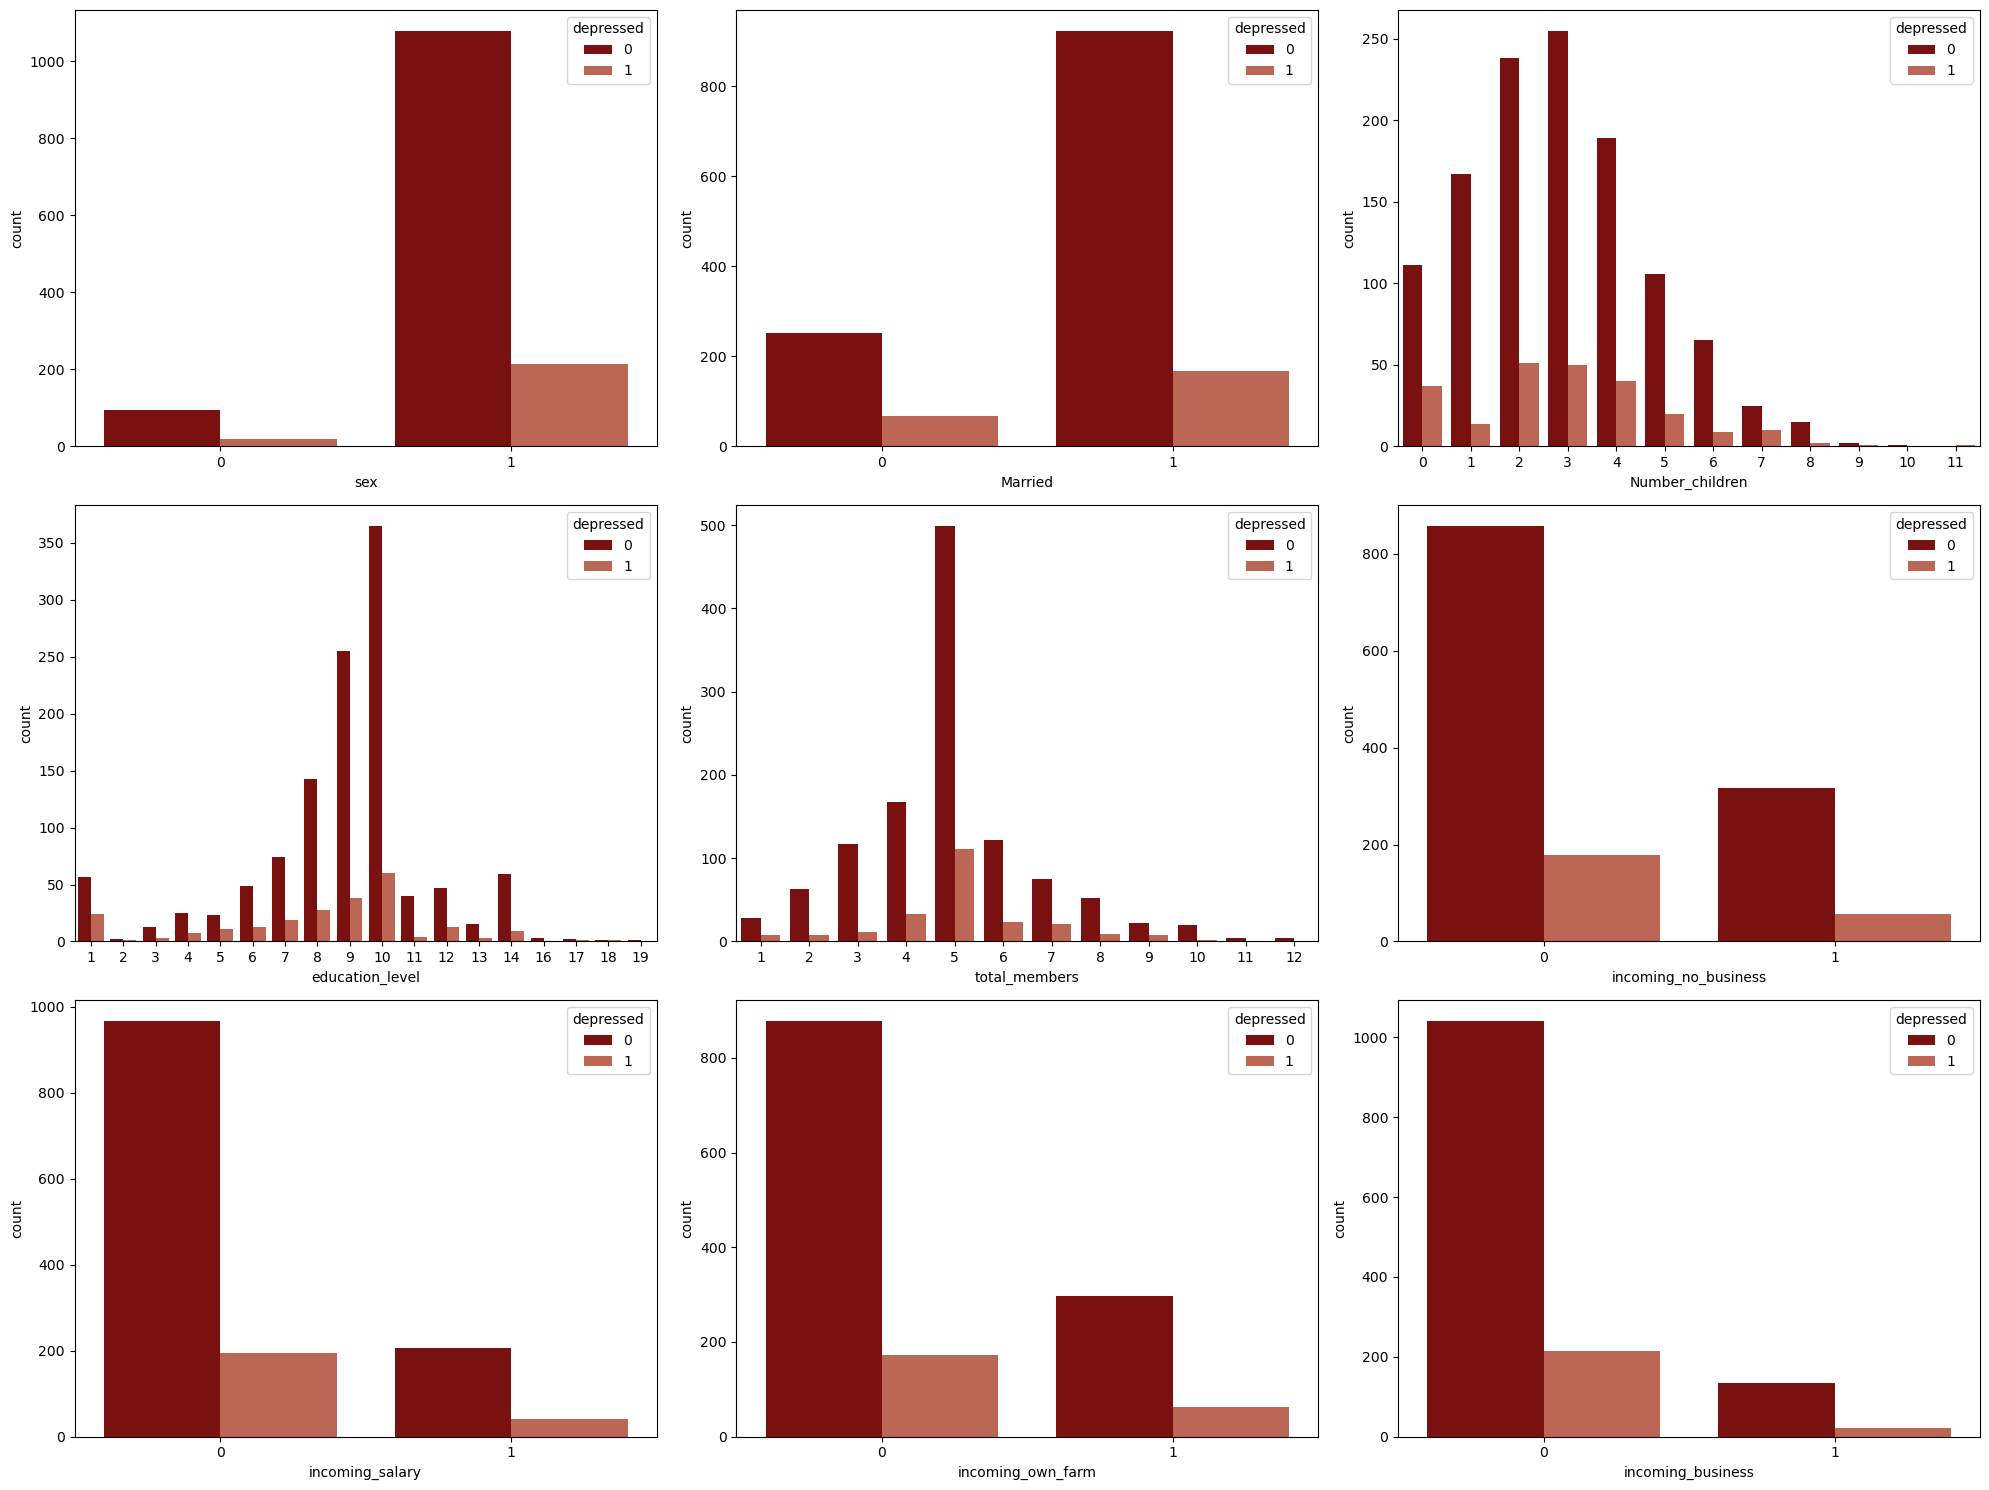

In [10]:
# Define custom colors
red = '#8B0000'    # Dark red color code
coral = '#CD5B45'  # Dark green color code

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=Dep, palette={0: red, 1: coral})
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=Dep, palette={0: red, 1: coral})
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=Dep, palette={0: red, 1: coral})

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=Dep, palette={0: red, 1: coral})
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=Dep, palette={0: red, 1: coral})
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=Dep, palette={0: red, 1: coral})

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=Dep, palette={0: red, 1: coral})
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=Dep, palette={0: red, 1: coral})
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=Dep, palette={0: red, 1: coral})

plt.tight_layout()
plt.show()

## Bar chart is plotted to see frequency distribution

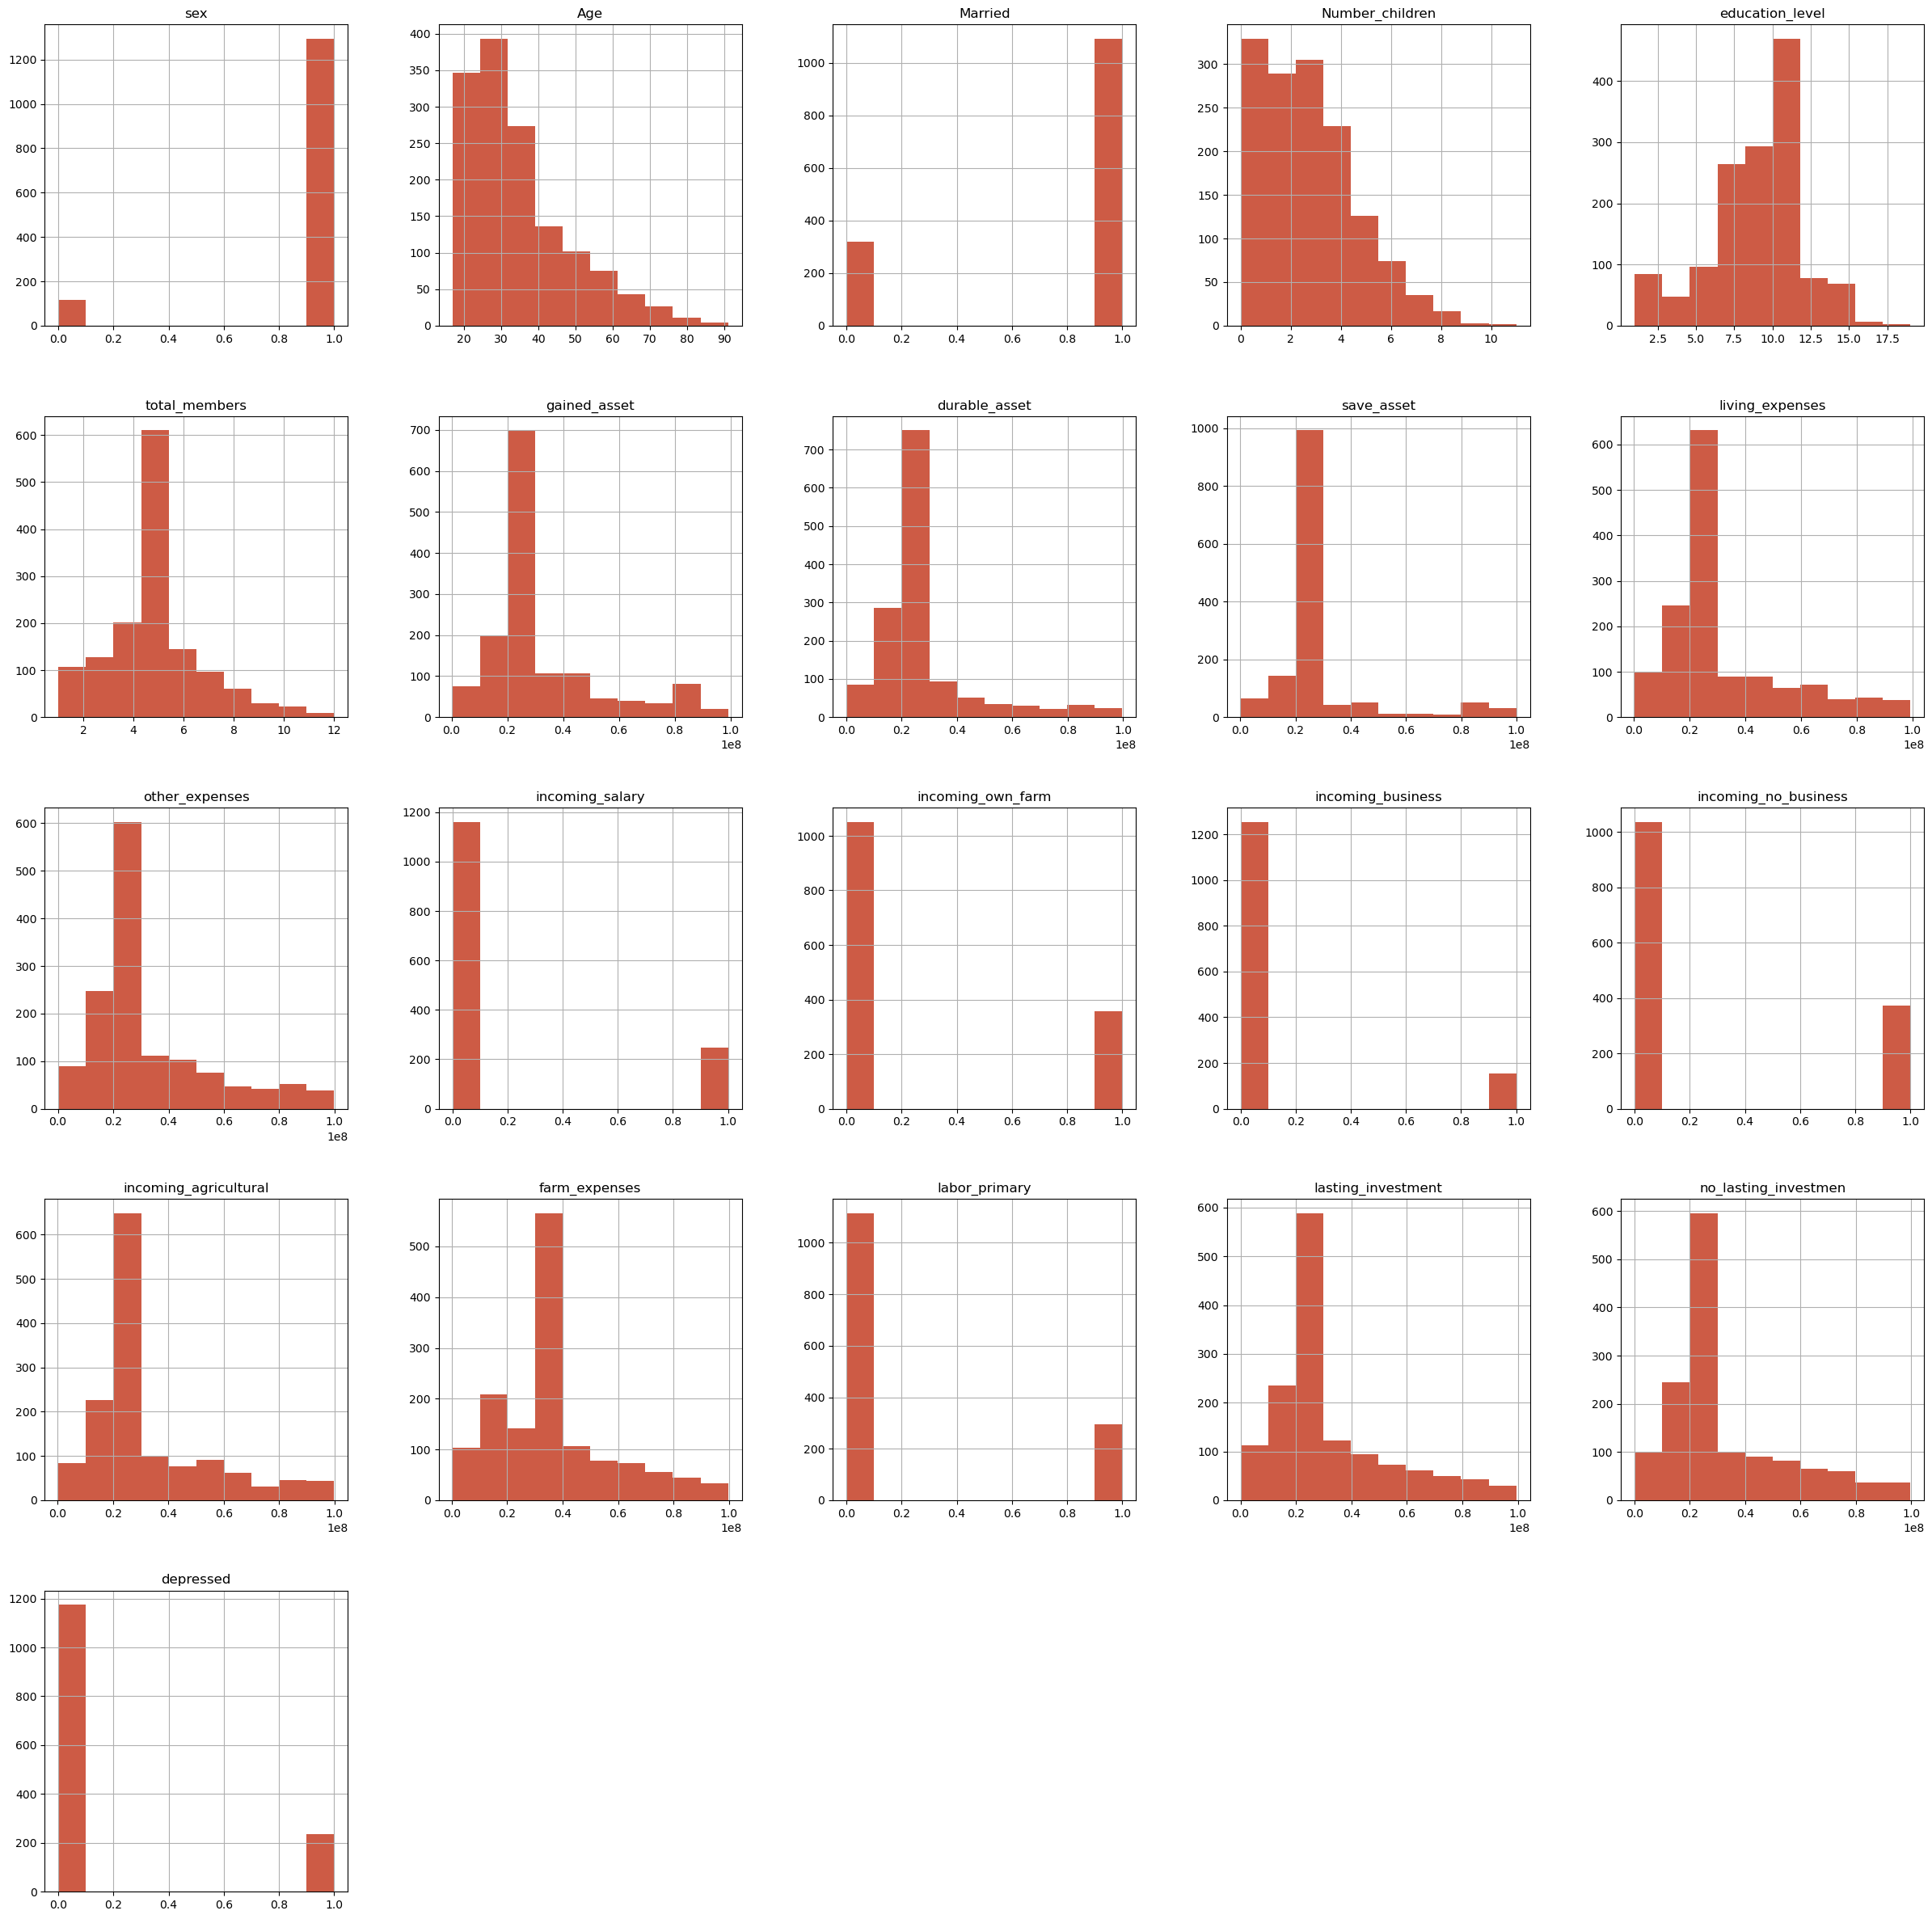

In [11]:
Dep.hist(bins=10, figsize=(30,30), color = '#CD5B45')
plt.show()

## Density plot to also see the frequency distribution

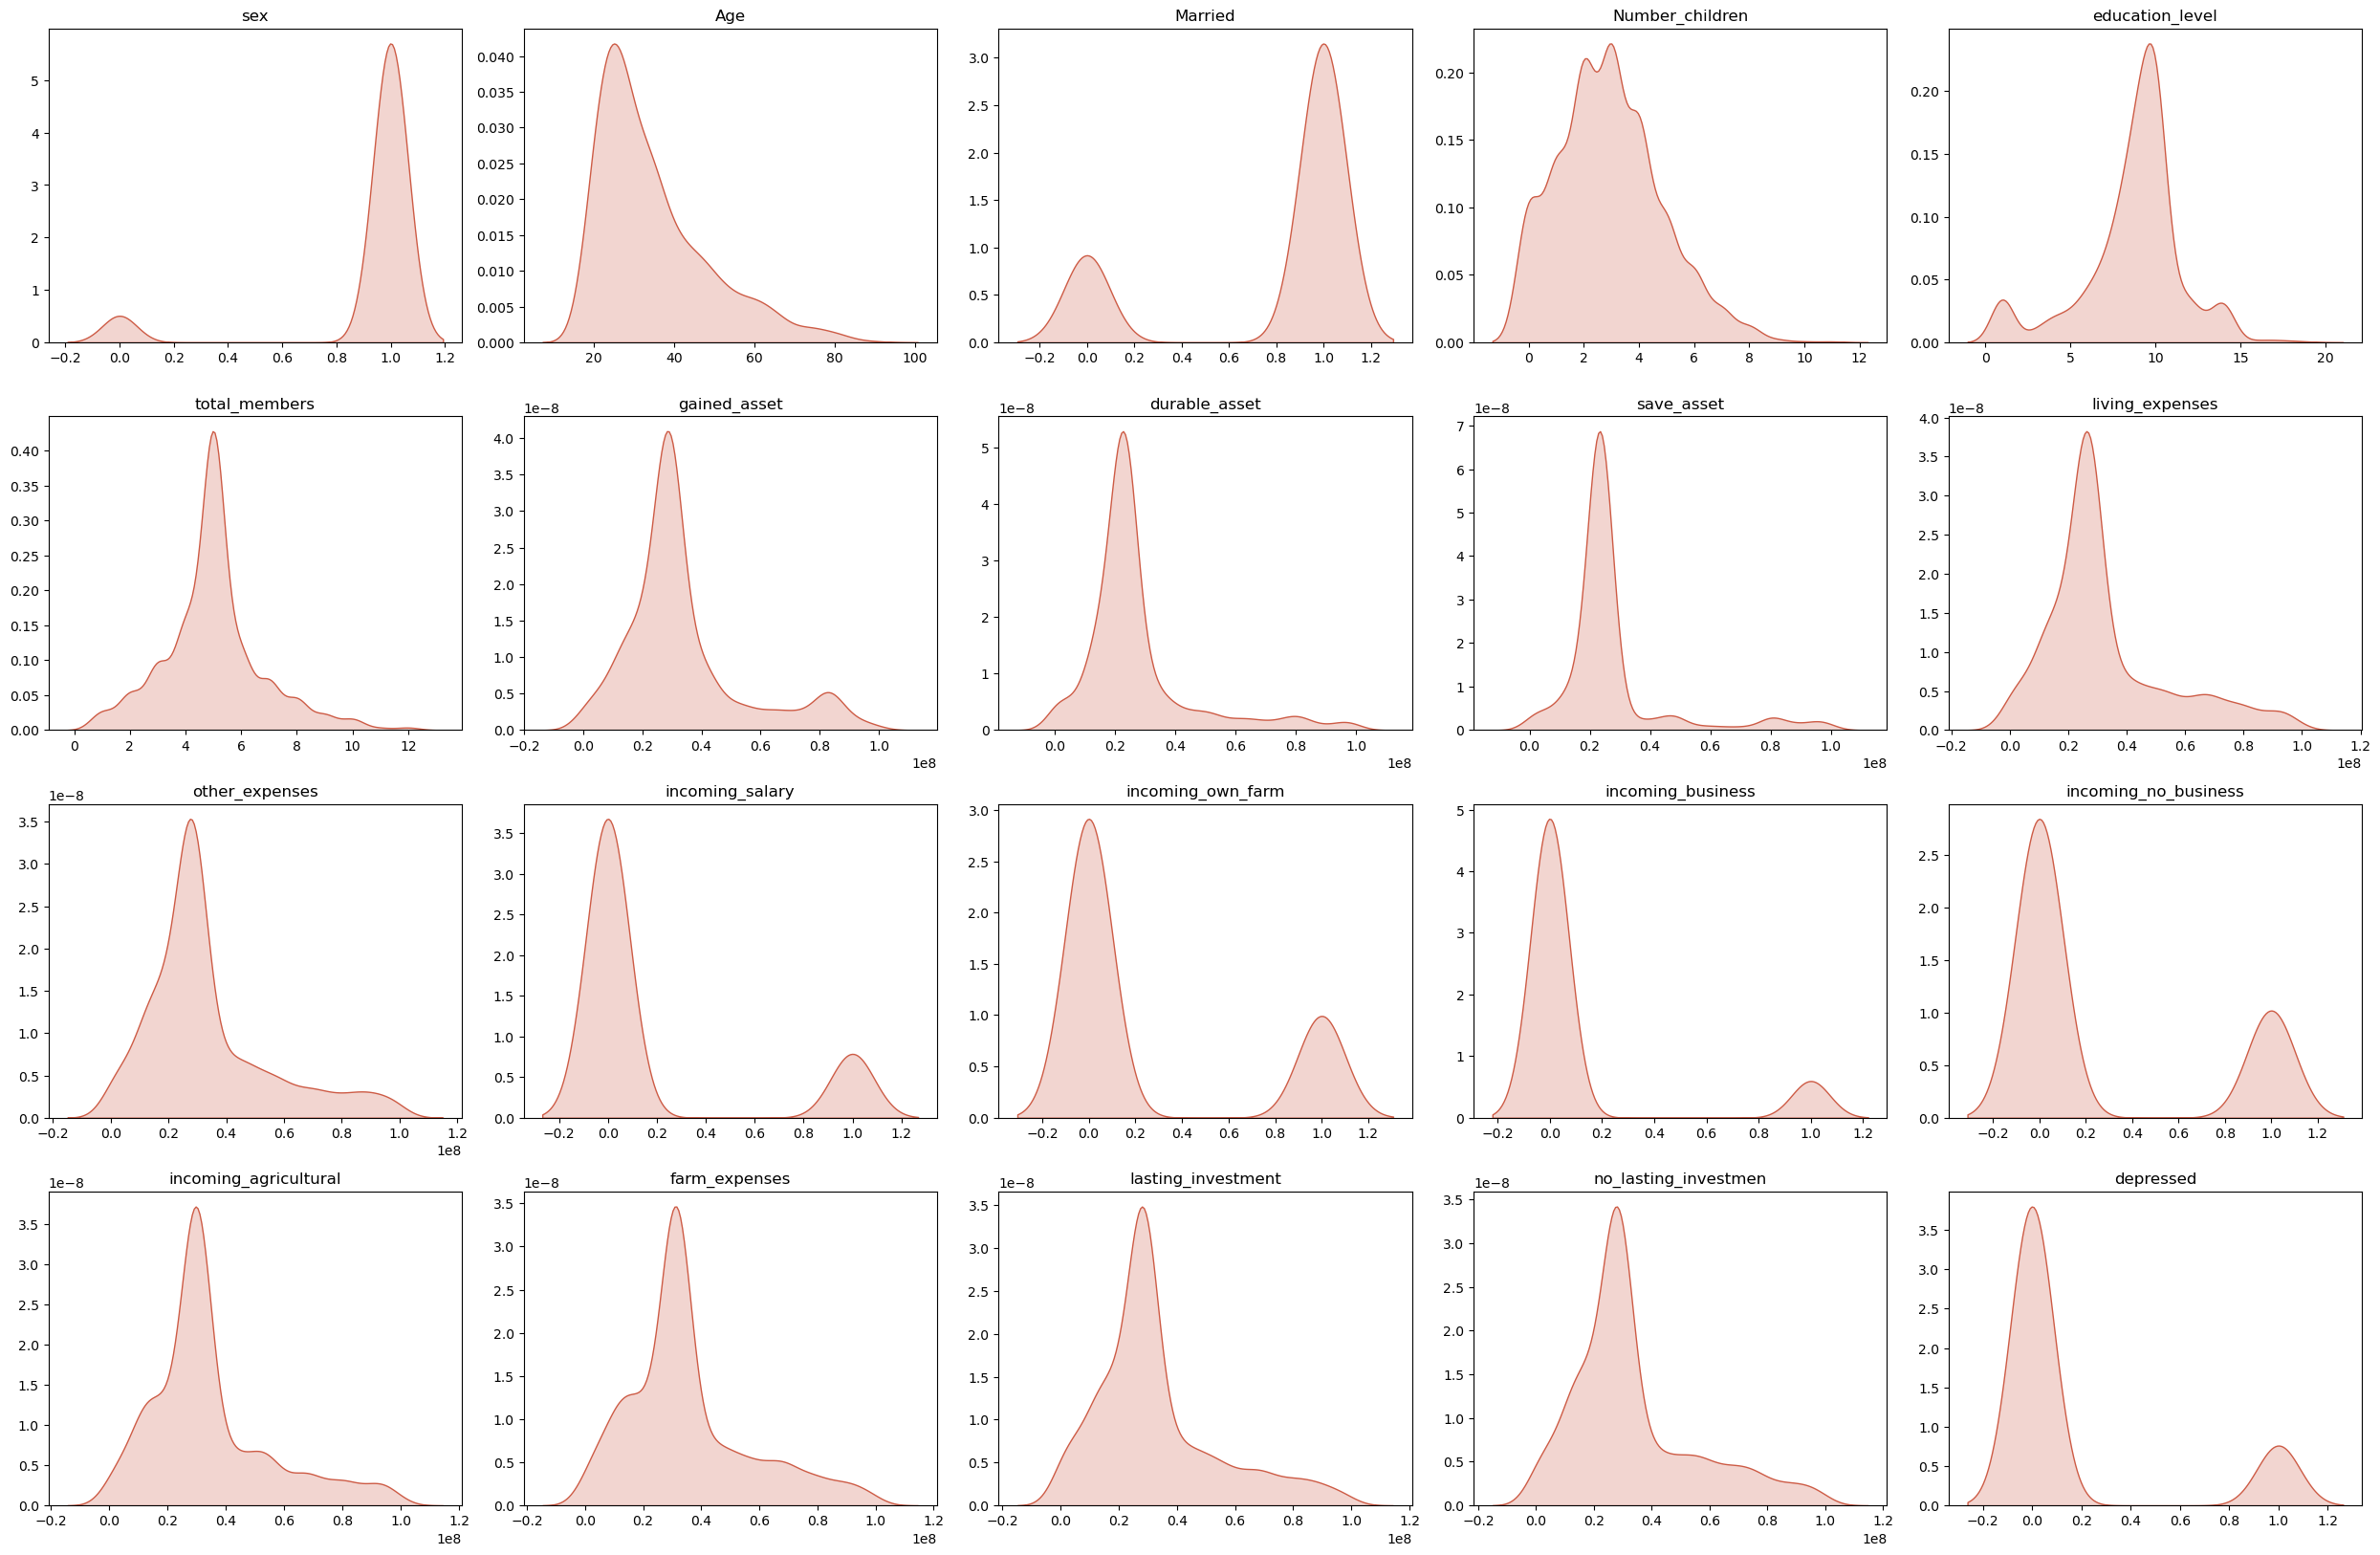

In [12]:
plt.figure(figsize=(25, 20))

plt.subplot(5, 5, 1)
sns.kdeplot(Dep['sex'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('sex')

plt.subplot(5, 5, 2)
sns.kdeplot(Dep['Age'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('Age')

plt.subplot(5, 5, 3)
sns.kdeplot(Dep['Married'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('Married')

plt.subplot(5, 5, 4)
sns.kdeplot(Dep['Number_children'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('Number_children')

plt.subplot(5, 5, 5)
sns.kdeplot(Dep['education_level'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('education_level')

plt.subplot(5, 5, 6)
sns.kdeplot(Dep['total_members'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('total_members')

plt.subplot(5, 5, 7)
sns.kdeplot(Dep['gained_asset'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('gained_asset')

plt.subplot(5, 5, 8)
sns.kdeplot(Dep['durable_asset'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('durable_asset')

plt.subplot(5, 5, 9)
sns.kdeplot(Dep['save_asset'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('save_asset')

plt.subplot(5, 5, 10)
sns.kdeplot(Dep['living_expenses'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('living_expenses')

plt.subplot(5, 5, 11)
sns.kdeplot(Dep['other_expenses'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('other_expenses')

plt.subplot(5, 5, 12)
sns.kdeplot(Dep['incoming_salary'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('incoming_salary')

plt.subplot(5, 5, 13)
sns.kdeplot(Dep['incoming_own_farm'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('incoming_own_farm')

plt.subplot(5, 5, 14)
sns.kdeplot(Dep['incoming_business'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('incoming_business')

plt.subplot(5, 5, 15)
sns.kdeplot(Dep['incoming_no_business'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('incoming_no_business')

plt.subplot(5, 5, 16)
sns.kdeplot(Dep['incoming_agricultural'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('incoming_agricultural')

plt.subplot(5, 5, 17)
sns.kdeplot(Dep['farm_expenses'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('farm_expenses')

plt.subplot(5, 5, 18)
sns.kdeplot(Dep['lasting_investment'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('lasting_investment')

plt.subplot(5, 5, 19)
sns.kdeplot(Dep['no_lasting_investmen'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('no_lasting_investmen')

plt.subplot(5, 5, 20)
sns.kdeplot(Dep['depressed'], shade=True, color='#CD5B45')
plt.xlabel('')
plt.ylabel('')
plt.title('depressed')

plt.tight_layout()
plt.show()


## Box plot to see any skewness in the data set

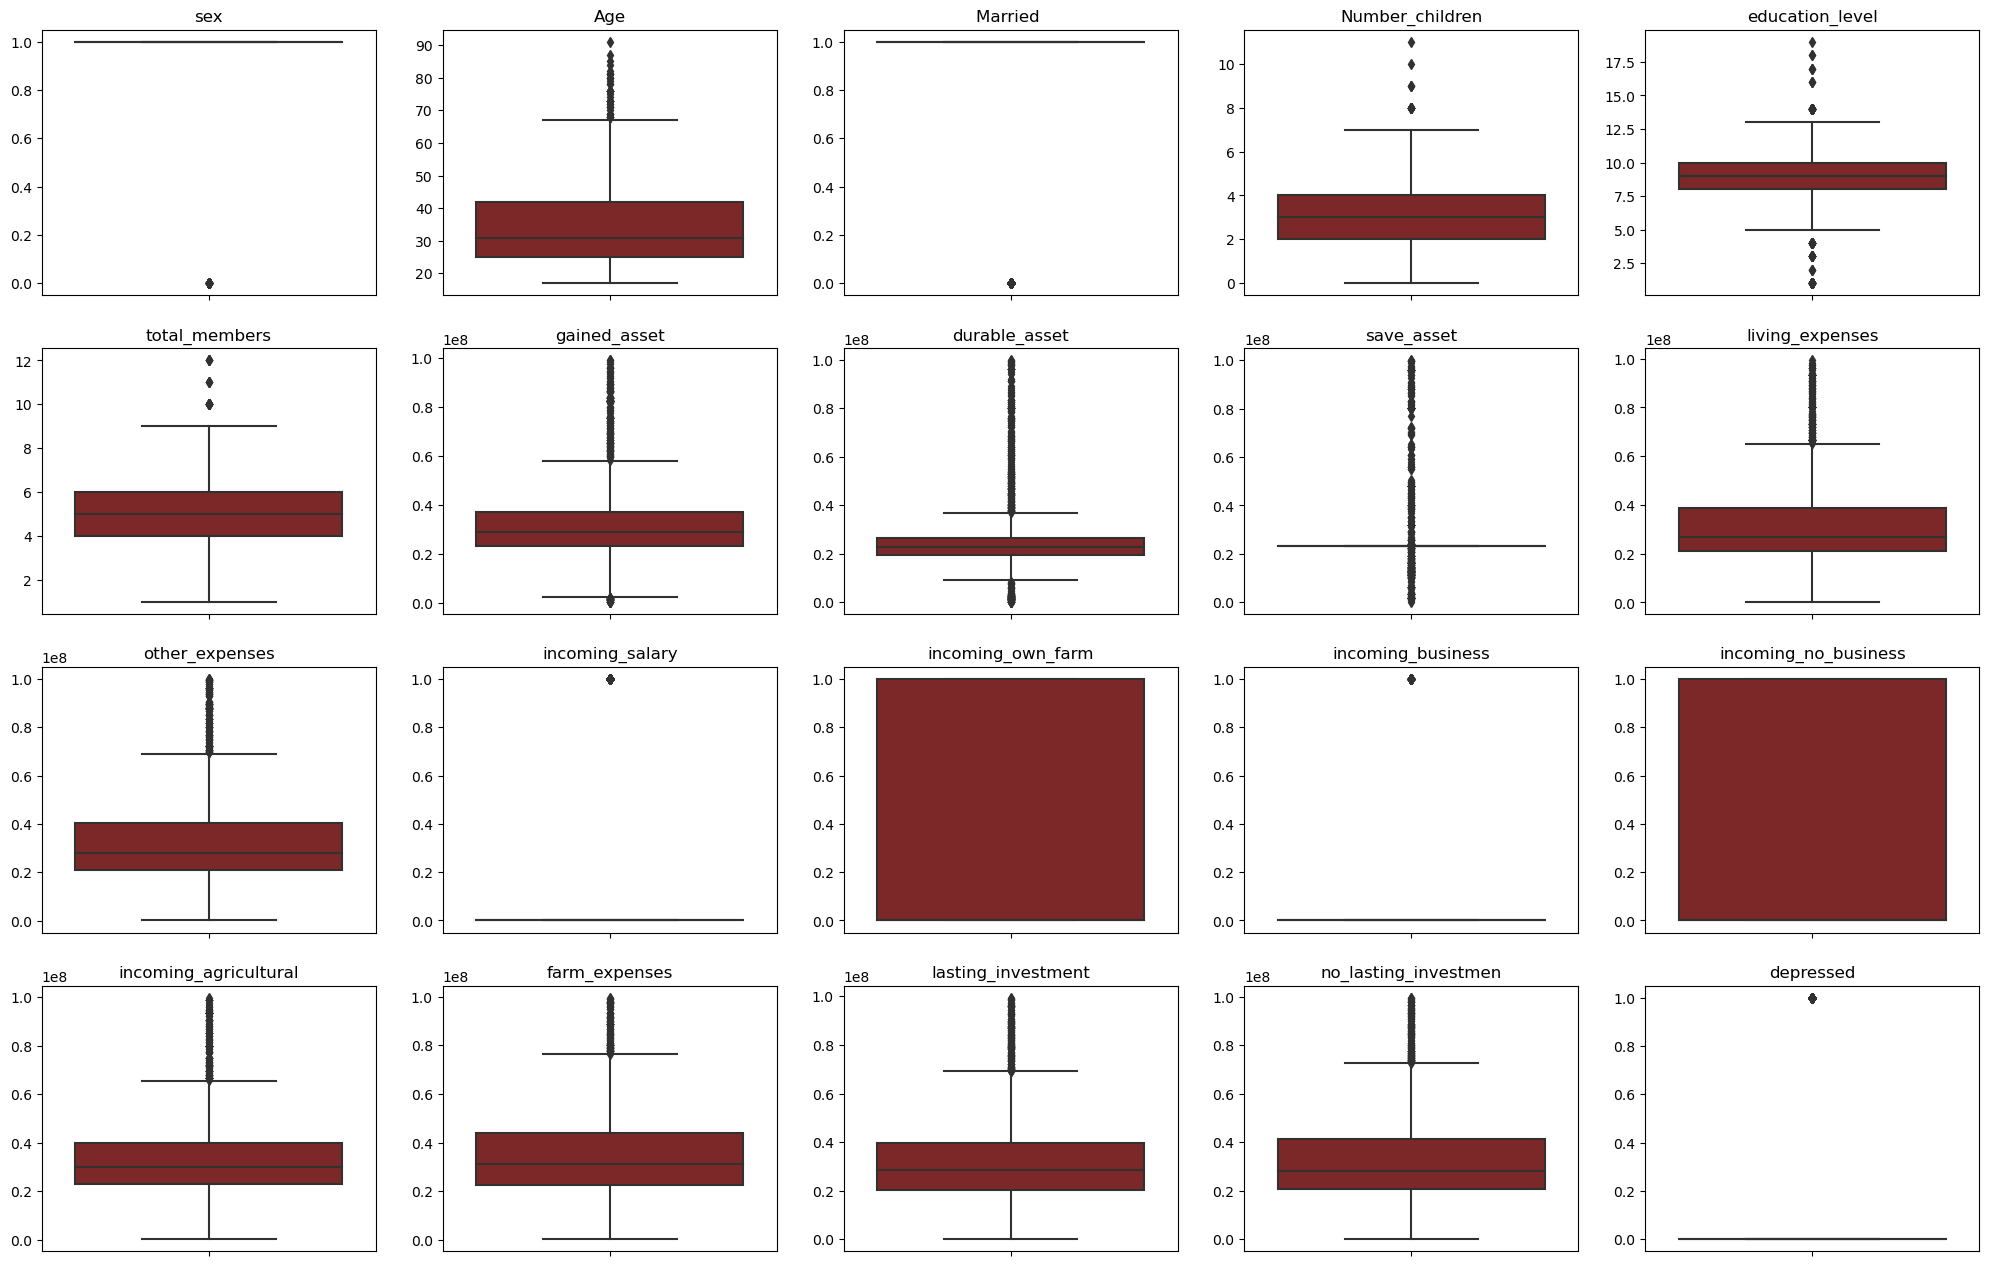

In [13]:
plt.figure(figsize = (25,20))

plt.subplot(5,5,1)
fig = sns.boxplot(y = Dep['sex'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('sex')

plt.subplot(5,5,2)
fig = sns.boxplot(y = Dep['Age'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('Age')

plt.subplot(5,5,3)
fig = sns.boxplot(y = Dep['Married'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('Married ')

plt.subplot(5,5,4)
fig = sns.boxplot(y = Dep['Number_children'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('Number_children')

plt.subplot(5,5,5)
fig = sns.boxplot(y = Dep['education_level'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('education_level')

plt.subplot(5,5,6)
fig = sns.boxplot(y = Dep['total_members'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('total_members')

plt.subplot(5,5,7)
fig = sns.boxplot(y = Dep['gained_asset'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('gained_asset')

plt.subplot(5,5,8)
fig = sns.boxplot(y = Dep['durable_asset'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('durable_asset')

plt.subplot(5,5,9)
fig = sns.boxplot(y = Dep['save_asset'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('save_asset')

plt.subplot(5,5,10)
fig = sns.boxplot(y = Dep['living_expenses'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('living_expenses')

plt.subplot(5,5,11)
fig = sns.boxplot(y = Dep['other_expenses'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('other_expenses')

plt.subplot(5,5,12)
fig = sns.boxplot(y = Dep['incoming_salary'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('incoming_salary')

plt.subplot(5,5,13)
fig = sns.boxplot(y = Dep['incoming_own_farm'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('incoming_own_farm')

plt.subplot(5,5,14)
fig = sns.boxplot(y = Dep['incoming_business'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('incoming_business')

plt.subplot(5,5,15)
fig = sns.boxplot(y = Dep['incoming_no_business'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('incoming_no_business')

plt.subplot(5,5,16)
fig = sns.boxplot(y = Dep['incoming_agricultural'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('incoming_agricultural')

plt.subplot(5,5,17)
fig = sns.boxplot(y = Dep['farm_expenses'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('farm_expenses')

# plt.subplot(5,5,18)
# fig = sns.kdeplot(Dep['labor_primary'], shade=True)
# fig = plt.xlabel('')
# fig = plt.ylabel('')
# plt.title('labor_primary')

plt.subplot(5,5,18)
fig = sns.boxplot(y = Dep['lasting_investment'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('lasting_investment')

plt.subplot(5,5,19)
fig = sns.boxplot(y = Dep['no_lasting_investmen'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('no_lasting_investmen')

plt.subplot(5,5,20)
fig = sns.boxplot(y = Dep['depressed'], color = '#8B1A1A')
fig = plt.xlabel('')
fig = plt.ylabel('')
plt.title('depressed')

plt.show()

## Show the distribution of the categories in the Target variable (depressed people and undepressed people)

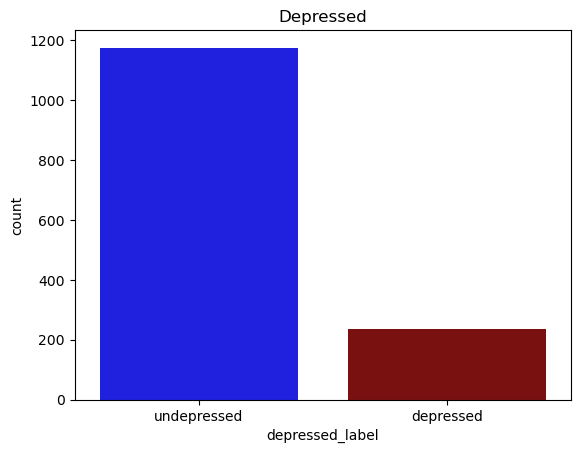

In [22]:
# This will show the distribution of the target variable and replaced the 0 and 1 originally in the dataset with Depressed and Undepressed.


# Mapping the categories to labels
Dep['depressed_label'] = Dep['depressed'].map({0: 'undepressed', 1: 'depressed'})

# Plotting the count plot
sns.countplot(data=Dep, x='depressed_label', palette=['blue', 'darkred'])

# Set title
plt.title("Depressed")

# Show the plot
plt.show()

Ths shows that the dataset is unbalanced

## Correlation plot  to see columns' interdependences before balancing of the datset

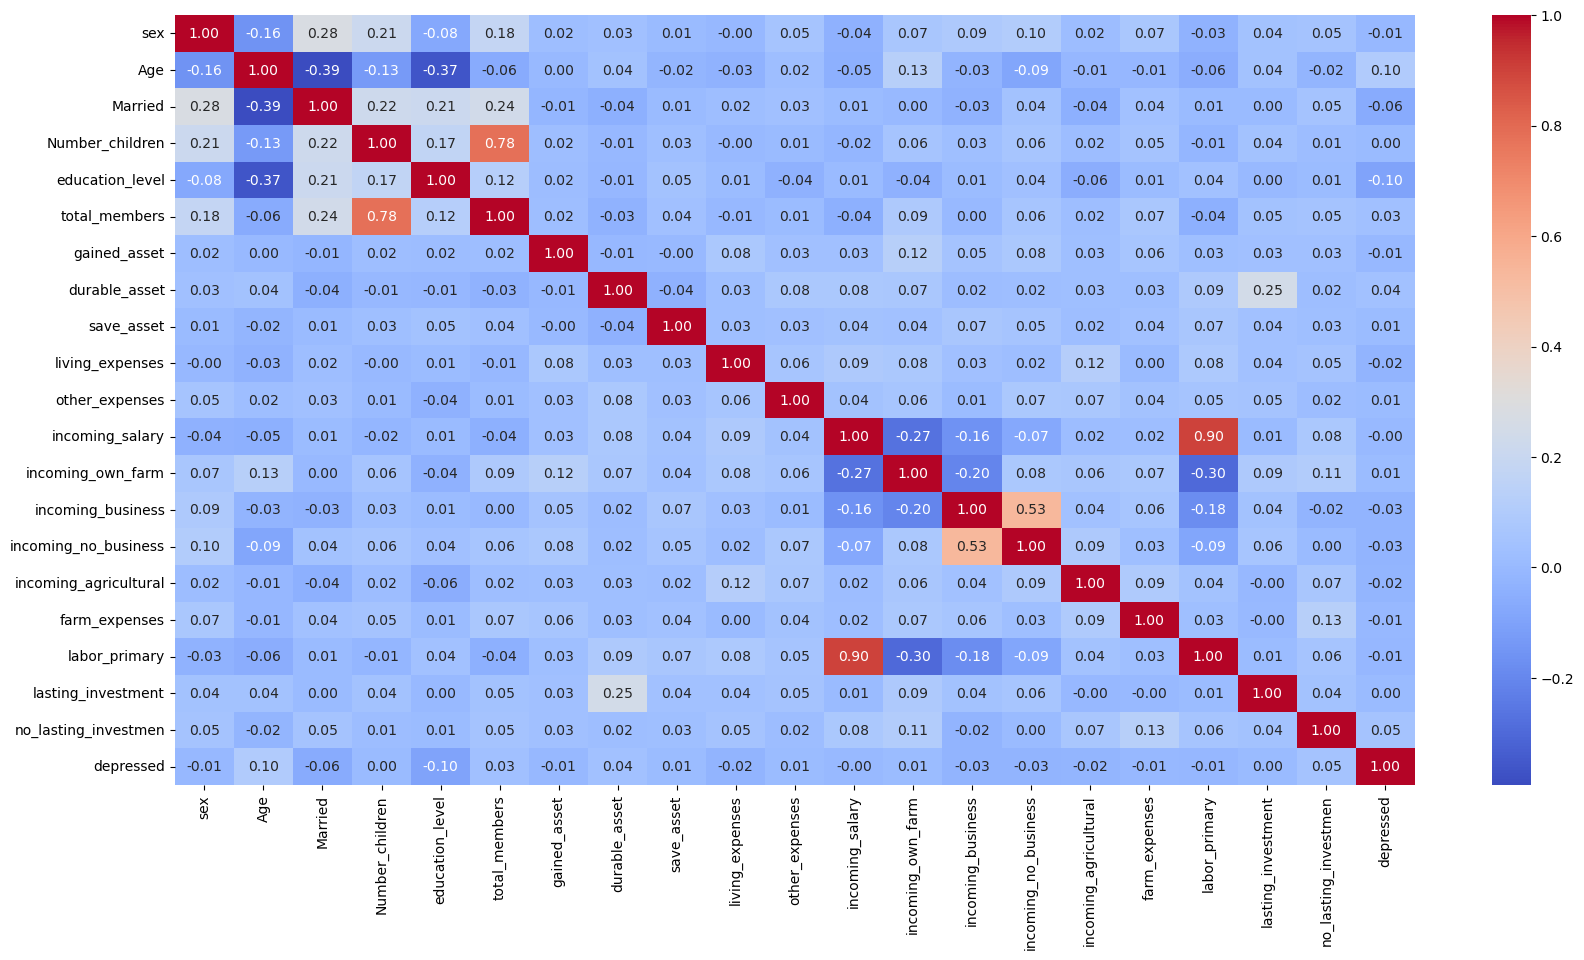

In [25]:
# Drop non-numeric columns
numeric_dep = Dep.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
plt.subplots(figsize=(20, 10))
sns.heatmap(numeric_dep.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [26]:
# Because the labor_primry column is highly correlated with the Target variable, it will also be dropped.
Dep = Dep.drop([ 'labor_primary'], axis = 1)

## Prepare The Dataset For The Model

The Target variable in the Dataset will be removed to see how well the model is able to perform, so that its output can then be compared to what the actual outcome should have been.

In [27]:
# Separating the Target variable from the other variables

X = Dep.drop(columns = ['depressed'], axis = 1)
Y = Dep["depressed"]

In [28]:
print("Count of depressed individuals before over-sampling and under-sampling '1': {}".format(sum(Y == 1)))
print("Count of non-depressed individuals before over-sampling and under-sampling '0': {}".format(sum(Y == 0)))

Count of depressed individuals before over-sampling and under-sampling '1': 235
Count of non-depressed individuals before over-sampling and under-sampling '0': 1174


In [29]:
# Check the first 5 rows of the dataset again.
Dep.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,depressed,depressed_label
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,28411718,28292707.0,0,undepressed
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,28411718,28292707.0,1,depressed
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,28411718,28292707.0,0,undepressed
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,7781123,69219765.0,0,undepressed
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,20100562,43419447.0,0,undepressed


## Balancing of the dataset

The SMOTEEN function is then used to balance the data set.

(Synthetic Minority Over-sampling Technique for Over-sampling and Edited Nearest Neighbors) function is a technique used to address class imbalance in machine learning datasets.

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTEENN

# X contains the feature matrix and Y contains the target variable

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Apply SMOTEENN for resampling
smt = SMOTEENN(random_state=42)
X_resampled, Y_resampled = smt.fit_resample(X, Y)

## A correlation plot is then created to see columns interdependence after balancing

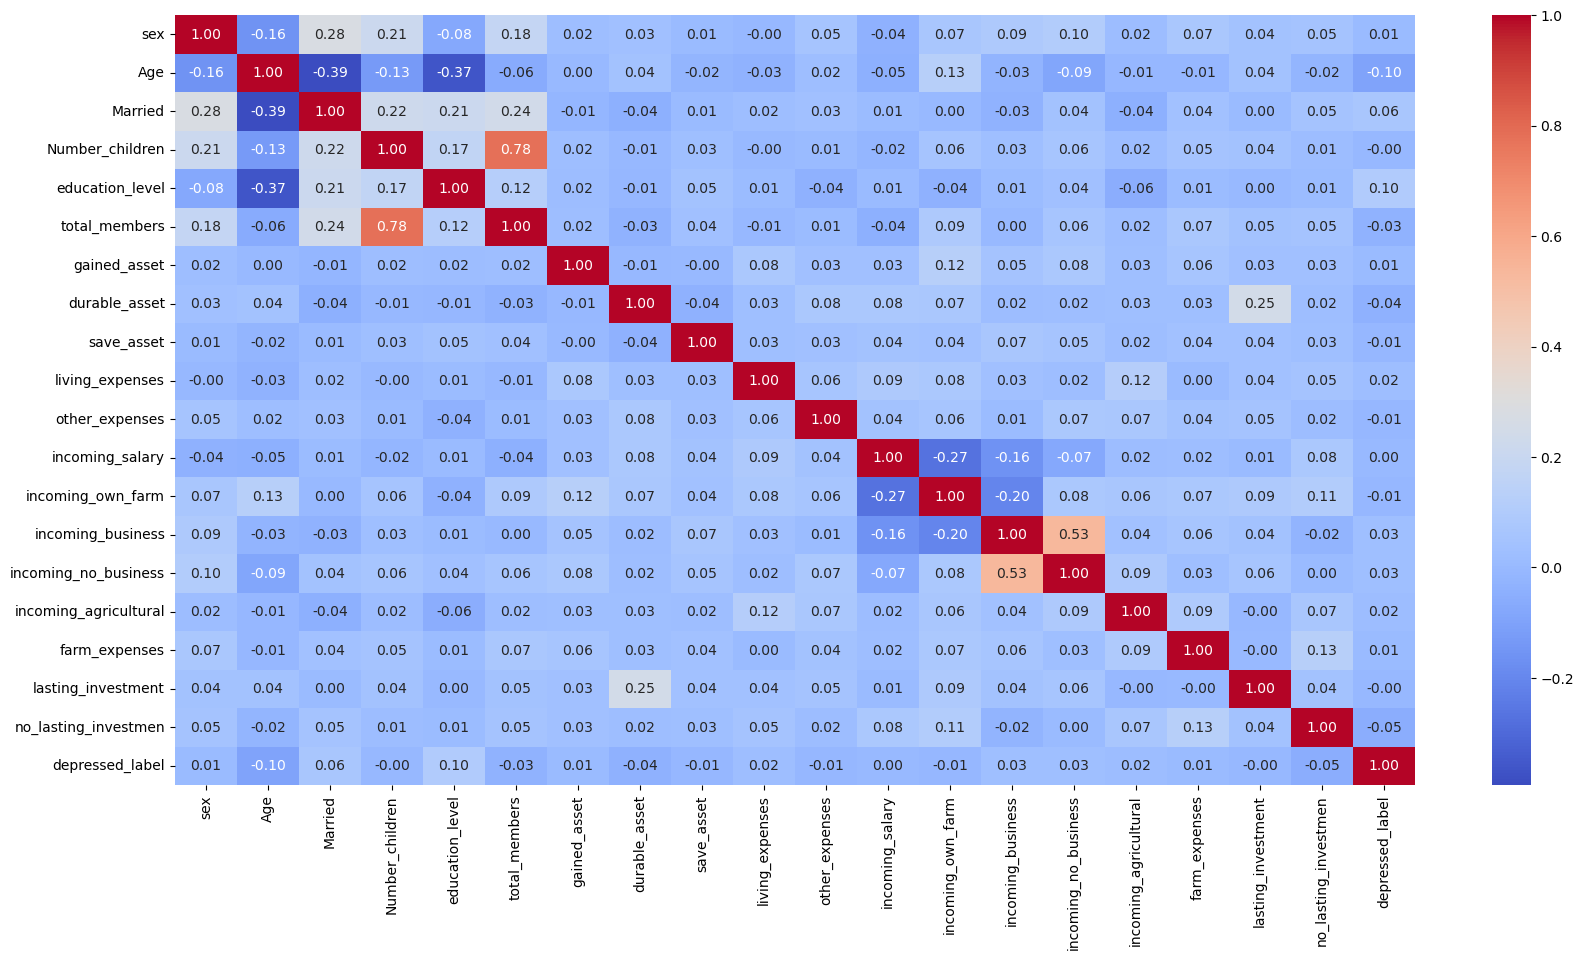

In [31]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(X.corr(), annot = True, fmt = ".2f", cmap='coolwarm')
plt.show()

## The effect of over-sampling can be seen in the target variable

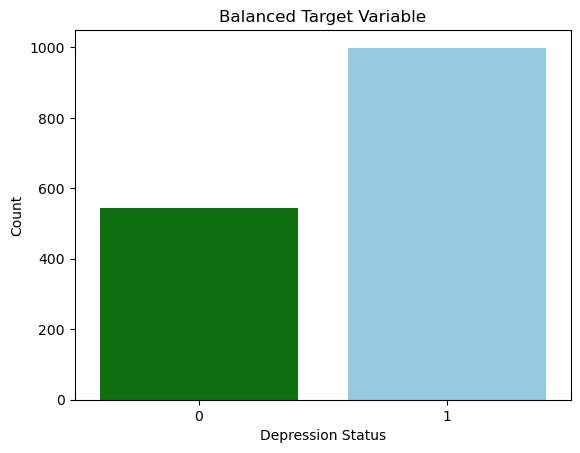

In [32]:
# Create a DataFrame from the resampled data
resampled_data = pd.DataFrame({'Y': Y_resampled})

# Plot the count plot of the balanced target variable
sns.countplot(data=resampled_data, x='Y', palette=['green', 'skyblue'])
plt.title("Balanced Target Variable")
plt.xlabel("Depression Status")
plt.ylabel("Count")
plt.show()


## Data set is then split into 70% to 30% ratio for training set and testing set respectively 

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=45)
print(X.shape,X_train.shape,X_test.shape)

(1409, 20) (986, 20) (423, 20)


# Building Models

## KNN

KNN is a simple algorithm that bases its prediction on the idea of similarity. It is a well-liked option for baseline models and as a benchmark for more complicated algorithms because of its simplicity of understanding and implementation. 


## Random Forest

In [36]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=43)
RF_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=43)

## Model is then trained with the train set and tested on the test set

In [37]:
train_predict=RF_model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict))

Accuracy on training data:  1.0
Precision on training data: 1.0
Recall on training data: 1.0


In [46]:
test_predict=RF_model.predict(X_test)
test_predict=RF_model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict))

Accuracy on testing data:  1.0
Precision on testing data: 1.0
Recall on testing data:  1.0


## Confusion matrix for the model is then plotted

TN=352, FP=0, FN=0, TP=71


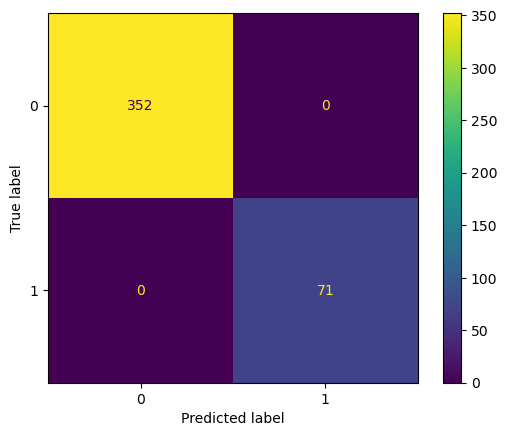

In [47]:
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [40]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  1.0
Calculated precision =  1.0
Calculated recall =  1.0


In [41]:
print(metrics.classification_report(Y_test, test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00        71

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



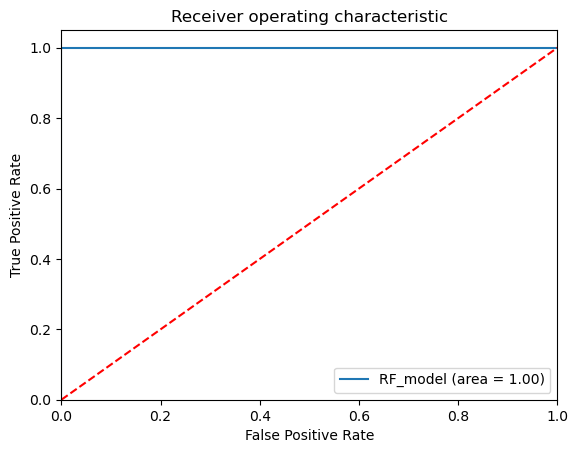

In [42]:
RF_model_roc_auc = roc_auc_score(Y_test, RF_model.predict(X_test))
RF_model_fpr, RF_model_tpr, RF_model_thresholds = roc_curve(Y_test, RF_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(RF_model_fpr, RF_model_tpr, label='RF_model (area = %0.2f)' % RF_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

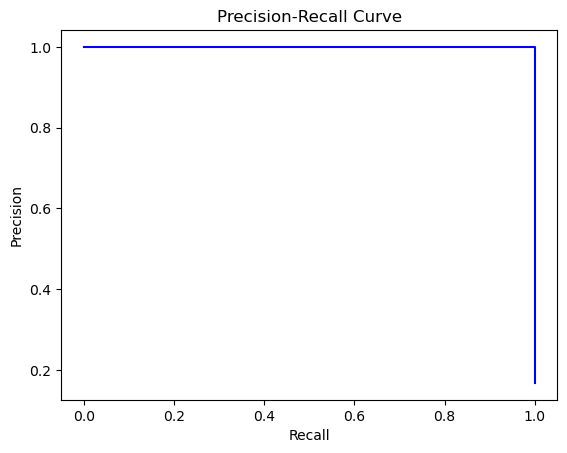

In [43]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, RF_model.predict_proba(X_test)[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [44]:
print("Calculated hamming_loss = %0.2f" % hamming_loss(Y_test, test_predict))

Calculated hamming_loss = 0.00


In [45]:
Dep.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'lasting_investment',
       'no_lasting_investmen', 'depressed', 'depressed_label'],
      dtype='object')

In [35]:
feature_scores = pd.DataFrame(RF_model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
print(feature_scores)

                              0
depressed_label        0.817416
Age                    0.020774
lasting_investment     0.015969
no_lasting_investmen   0.015161
education_level        0.013711
incoming_agricultural  0.013203
durable_asset          0.012984
farm_expenses          0.012920
other_expenses         0.012663
living_expenses        0.011724
Number_children        0.011184
save_asset             0.011090
gained_asset           0.010216
total_members          0.008245
Married                0.004417
incoming_own_farm      0.002268
incoming_no_business   0.002108
incoming_salary        0.001796
sex                    0.001148
incoming_business      0.001002


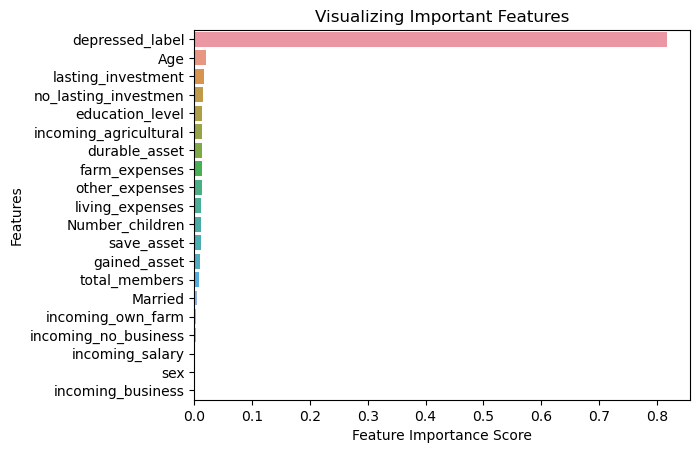

In [36]:
feature_score = pd.Series(RF_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score
# Creating a seaborn bar plot

sns.barplot(x=feature_score, y=feature_score.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

## Bias and Fairness

In [57]:
X_train_gb = X_train.drop(columns=['sex'])
X_test_gb = X_test.drop(columns=['sex'])

In [58]:
RF_model_gb = RandomForestClassifier(n_estimators=100)
RF_model_gb.fit(X_train_gb,Y_train)

RandomForestClassifier()

In [59]:
train_predict_gb=RF_model_gb.predict(X_train_gb)
print("Accuracy on train data: ", metrics.accuracy_score(Y_train, train_predict_gb))
print("Precision using train data:", metrics.precision_score(Y_train, train_predict_gb))
print("Recall using train data:", metrics.recall_score(Y_train, train_predict_gb))

Accuracy on train data:  1.0
Precision using train data: 1.0
Recall using train data: 1.0


In [60]:
test_predict_gb=RF_model_gb.predict(X_test_gb)
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, test_predict_gb))
print("Precision using test data:", metrics.precision_score(Y_test, test_predict_gb))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict_gb))

Accuracy on test data:  1.0
Precision using test data: 1.0
Recall on testing data:  1.0


In [61]:
print(metrics.classification_report(Y_test, test_predict_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00        71

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



# Splitting into Protected Groups

## Check for the Gender Distribution

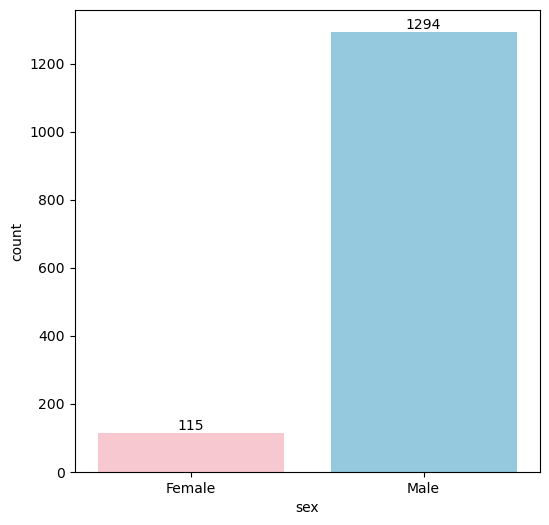

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for Male and Female
custom_colors = ["pink", "skyblue"]

plt.figure(figsize=(6, 6))
ax = sns.countplot(data=Dep, x='sex', palette=custom_colors)

# Set x-axis tick labels
ax.set_xticklabels(['Female', 'Male'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()



In [74]:
PROTECTED  =  "sex" 
MEN =  1.0 #male 
WOMEN = 0.0 #women
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  30  31  32  33  35  36  37
  38  39  40  41  42  43  44  45  46  48  49  50  51  52  53  54  56  57
  58  59  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78
  80  81  82  85  86  87  88  89  90  91  92  93  95  96  97  99 100 101
 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 118 120 121
 122 123 124 125 126 127 128 129 131 132 133 134 135 136 137 139 140 141
 142 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158 160 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 183 185 186 187 188 189 191 192 193 194 195 196 197 198 199 200 202
 203 205 206 207 208 209 210 211 213 214 215 216 217 218 220 221 222 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 243
 244 245 246 247 248 249 250 253 254 256 258 259 260 261 262 263 264 266
 268 270 272 273 274 275 276 277 278 279 280 281 28

In [77]:
Y_test = Y_test

### Extract the outcome and predictiction for the Gendedr Groups

In [78]:
Y_test_m = [Y_test[i] for i in men_indices]
Y_test_f = [Y_test[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 

In [79]:
test_predict_m = [test_predict[i] for i in men_indices]
test_predict_f = [test_predict[i] for i in women_indices]
print(test_predict_m)
print(test_predict_f)

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 

## Model on the males

TN=314, FP=0, FN=0, TP=62


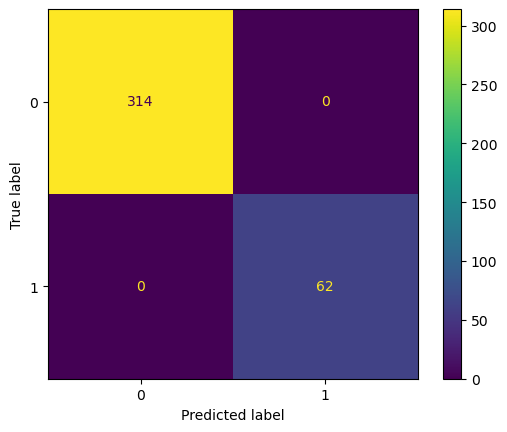

In [80]:
cm_m = metrics.confusion_matrix(Y_test_m, test_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_m, FP_m, FN_m, TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp.plot()
plt.show()

In [81]:
calculated_accuracy_m = (TP_m+TN_m)/(TP_m+TN_m+FP_m+FN_m)
calculated_precision_m = (TP_m)/(TP_m+FP_m)
calculated_recall_m = (TP_m)/(TP_m+FN_m)
calculated_specificity_m = (TN_m)/(TN_m+FP_m)
print("Calculated accuracy = ", calculated_accuracy_m)
print("Calculated precision = ", calculated_precision_m)
print("Calculated recall = ", calculated_recall_m)
print("Calculated specificity = ", calculated_specificity_m)

Calculated accuracy =  1.0
Calculated precision =  1.0
Calculated recall =  1.0
Calculated specificity =  1.0


### Model on the Females

TN=38, FP=0, FN=0, TP=9


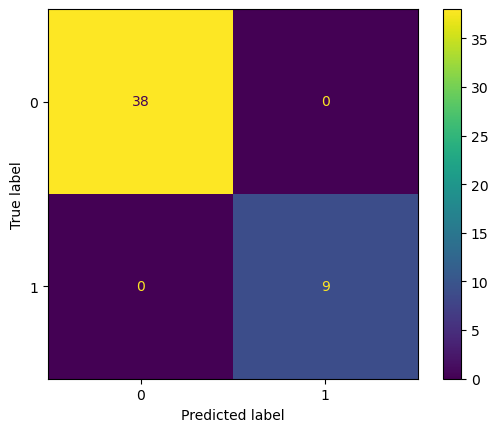

In [82]:
cm_f = metrics.confusion_matrix(Y_test_f, test_predict_f)
TN_f, FP_f, FN_f, TP_f = cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_f, FP_f, FN_f, TP_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot()
plt.show()

In [83]:
calculated_accuracy_f = (TP_f+TN_f)/(TP_f+TN_f+FP_f+FN_f)
calculated_precision_f = (TP_f)/(TP_f+FP_f)
calculated_recall_f = (TP_f)/(TP_f+FN_f)
calculated_specificity_f = (TN_f)/(TN_f+FP_f)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated specificity = ", calculated_specificity_f)

Calculated accuracy =  1.0
Calculated precision =  1.0
Calculated recall =  1.0
Calculated specificity =  1.0


In [84]:
print(metrics.classification_report(Y_test_m, test_predict_m))
print("Positive Rate", (TP_m+FP_m)/(TP_m+FP_m+TN_m+FN_m))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00        62

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376

Positive Rate 0.16489361702127658


In [85]:
print(metrics.classification_report(Y_test_f, test_predict_f))
print("Positive Rate", (TP_f+FP_f)/(TP_f+FP_f+TN_f+FN_f))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00         9

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Positive Rate 0.19148936170212766


## Transparency (Explainable AI)

In [48]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
RF_model = RandomForestClassifier(max_depth=17, min_samples_leaf=3, max_samples=0.5, random_state=100)
RF_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=17, max_samples=0.5, min_samples_leaf=3,
                       random_state=100)

In [50]:
RF_y_pred = RF_model.predict(X_train)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RF_model.score(X_train, Y_train)))

Accuracy of Random Forest classifier on test set: 1.00


In [51]:
# Drop the model into a joblib file
dump(RF_model, 'RF_depression.joblib')

['RF_depression.joblib']

In [52]:
# Load the joblib file 
model_from_file = load('RF_depression.joblib')

In [53]:
# Import the LIME package

import lime.lime_tabular

In [54]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                   feature_names=X_train.columns,
                                                   verbose=True, mode='classification')

In [55]:
explanation = explainer.explain_instance(X_test.iloc[2], RF_model.predict_proba)

Intercept 0.26190684990367397
Prediction_local [0.18960126]
Right: 0.07983333333333333


In [56]:
explanation.show_in_notebook(show_table=True)

In [95]:
explanation.as_list()

[('incoming_salary <= 0.00', -0.023656009951020365),
 ('save_asset <= 23399979.00', 0.0223995753164641),
 ('8.00 < education_level <= 9.00', -0.021507727816529466),
 ('3.00 < Number_children <= 4.00', 0.015681953922371025),
 ('no_lasting_investmen <= 20760369.00', -0.01552969058519471),
 ('incoming_agricultural > 40038424.00', 0.014713696372289226),
 ('incoming_business > 0.00', 0.011962157107319415),
 ('incoming_own_farm <= 0.00', 0.010306124402900968),
 ('durable_asset > 26805725.50', 0.00935776989693149),
 ('Age > 40.00', 0.007246957276878616)]